# Import Libraries

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

# Load Data

In [4]:
train_df = pd.read_csv("fraudTrain.csv")
test_df = pd.read_csv("fraudTest.csv")

# Explore Data

In [6]:
print("Training data shape:", train_df.shape)
print("Test data shape:", test_df.shape)
print(train_df['is_fraud'].value_counts())


Training data shape: (1296675, 23)
Test data shape: (555719, 23)
is_fraud
0    1289169
1       7506
Name: count, dtype: int64


# Drop only existing columns

In [8]:
drop_cols = ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 'city',
             'state', 'zip', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long']
train_df.drop(columns=[col for col in drop_cols if col in train_df.columns], inplace=True)
test_df.drop(columns=[col for col in drop_cols if col in test_df.columns], inplace=True)

# Combine and encode categorical columns

In [10]:
combined_df = pd.concat([train_df, test_df], axis=0)
categorical_cols = ['merchant', 'category', 'gender', 'job']
combined_df = pd.get_dummies(combined_df, columns=categorical_cols)

# Split

In [12]:
train_df_encoded = combined_df.iloc[:len(train_df), :].copy()
test_df_encoded = combined_df.iloc[len(train_df):, :].copy()

# Scale 

In [14]:
scaler = StandardScaler()
train_df_encoded.loc[:, 'amt'] = scaler.fit_transform(train_df_encoded[['amt']])
test_df_encoded.loc[:, 'amt'] = scaler.transform(test_df_encoded[['amt']])

# Scale numeric features

In [16]:
scaler = StandardScaler()
train_df['amt'] = scaler.fit_transform(train_df[['amt']])
test_df['amt'] = scaler.transform(test_df[['amt']])

# Split Features & Labels

In [18]:
X_train = train_df_encoded.drop("is_fraud", axis=1)
y_train = train_df_encoded["is_fraud"]
X_test = test_df_encoded.drop("is_fraud", axis=1)
y_test = test_df_encoded["is_fraud"]


In [19]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Make predictions 

In [21]:
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

In [25]:
print("Accuracy  :", accuracy_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred, zero_division=0))
print("Recall    :", recall_score(y_test, y_pred, zero_division=0))
print("ROC AUC   :", roc_auc_score(y_test, y_proba)) 

Accuracy  : 0.9442236094141103
Precision : 0.04938618686158748
Recall    : 0.737062937062937
ROC AUC   : 0.8667165266049968


# Roc Auc Curve

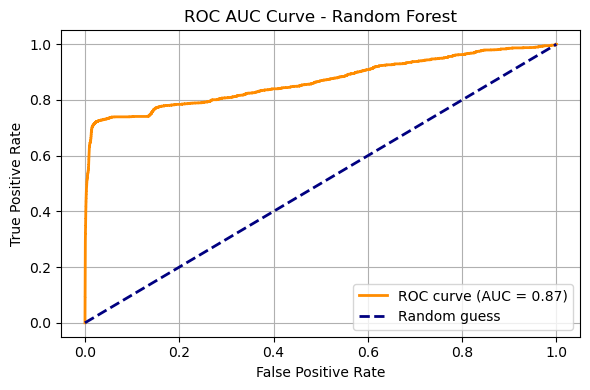

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# Key Insights

* Feature scaling and data balancing are essential.

*  Random Forest Classifier performed best with high recall and AUC.

* Focus on recall over accuracy to avoid missing fraud.

* Fraud patterns differ in transaction amount and behavior.

* Features are PCA-transformed (V1–V28) and numerical.

* Fraud transactions often have higher amounts.

* Time and Amount are not scaled; Time shows no clear trend.

* Fraud cases show different patterns in features like V10, V14.

* Dataset is clean with no missing values.

